In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime, timedelta

In [2]:
def variacao(ultimo, maximo, minimo, fator=0.1):
  media = ((maximo + minimo) / 2)
  if ultimo > media:
    # Calcular a distância ao valor máximo
    distancia = maximo - ultimo
  else:
    # Calcular a distância ao valor mínimo
    distancia = ultimo - minimo

  # Ajustar a variação proporcional à distância ao valor máximo
  return max(0, distancia * fator * np.random.rand())

In [3]:
def novo_dado(conf, dados, variacao, sensor = None):
  ultimo_valor = dados[-1]
  t_status = conf['status']

  if conf['status'] == True:
    sinal = -1
  else:
    sinal = 1

  if (sensor == 'lux'):
    if conf['status'] == True:
      # Falha na iluminação parcial
      novo_valor = conf['maximo'] * np.random.uniform(0, 0.20)
      # Falha na iluminação total
      # novo_valor = conf['minimo'] * np.random.uniform(0, 0.10)
      # Iluminação sem Falha
      # novo_valor = conf['maximo']
    else:
      novo_valor = conf['minimo']
  else:
    # Temperatura e Humidade sem falhas
    # novo_valor = ultimo_valor + (variacao(ultimo_valor, conf['maximo'], conf['minimo'], fator=conf['variacao']) * sinal)
    # Temperatura e humidade com falha total
    novo_valor = ultimo_valor + (variacao(ultimo_valor, conf['maximo'], conf['minimo'], fator=conf['variacao']) * sinal)      
    # Temperatura e humidade com falha parcial
    # novo_valor = ultimo_valor + (variacao(ultimo_valor, conf['minimo'] * 1.15, conf['minimo'], fator=conf['variacao']) * sinal)
  # Garantir que o novo valor não exceda o valor máximo
  return min(novo_valor, conf['maximo'])

In [4]:
def gerar_dados(tamanho, t_conf, h_conf, l_conf):
    t_dados = [t_conf['inicial']]
    h_dados = [h_conf['inicial']]
    l_dados = [l_conf['inicial']]
    data_inicial = datetime(2024, 6, 5, 9, 35, 2)
    date = [data_inicial]
    for _ in range(tamanho - 1):
      t_valor = novo_dado(t_conf, t_dados, variacao)
      h_valor = novo_dado(h_conf, h_dados, variacao)
      l_valor = novo_dado(l_conf, l_dados, variacao, sensor='lux')

      t_dados.append(t_valor)
      h_dados.append(h_valor)
      l_dados.append(l_valor)

      date.append(date[-1] + timedelta(minutes=1))


    t_status = [not t_conf['status']] * len(t_dados)
    h_status = [not h_conf['status']] * len(h_dados)
    l_status = [l_conf['status']] * len(l_dados)

    ac_status = [True] * (len(t_dados))
    door_status = [True] * (len(t_dados))
    light_status = [True] * (len(t_dados))
    # Mudar para cada situação
    label = [3] * len(t_dados)
    # 0 - Normal
    # 1 - Falha iluminação
    # 2 - Falha Climatização
    # 3 - Falha Climatização e Iluminação

    return {'t': t_dados, 't_status': t_status, 'h': h_dados, 'h_status': h_status, 'l': l_dados, 'l_status': l_status, 'timestamp': date, 'ac_status': ac_status, 'door_status': door_status, 'light_status': light_status, 'label': label}

               t  t_status          h  h_status           l  l_status  \
0      23.010000      True  44.010000      True  499.010000      True   
1      23.010407      True  44.010166      True    2.893498      True   
2      23.012967      True  44.010260      True   85.004701      True   
3      23.015476      True  44.010492      True   52.311479      True   
4      23.019946      True  44.011377      True   81.653671      True   
...          ...       ...        ...       ...         ...       ...   
99995  32.000000      True  75.000000      True    8.786145      True   
99996  32.000000      True  75.000000      True   27.061714      True   
99997  32.000000      True  75.000000      True   50.074304      True   
99998  32.000000      True  75.000000      True    4.866792      True   
99999  32.000000      True  75.000000      True   92.333372      True   

                timestamp  ac_status  door_status  light_status  label  
0     2024-06-05 09:35:02       True         True 

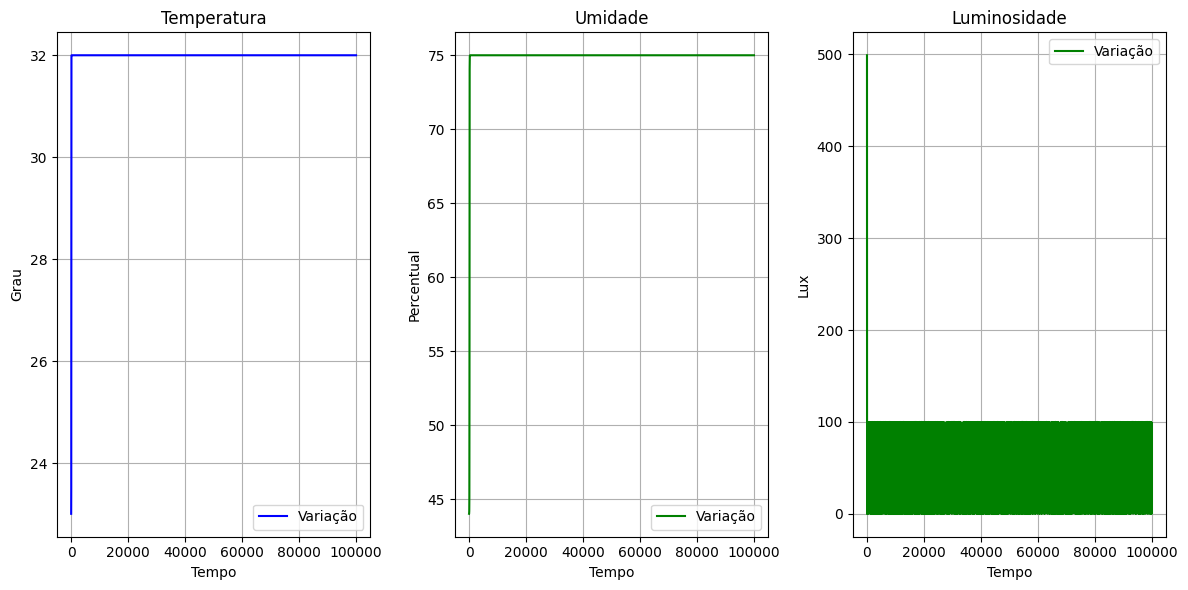

In [5]:
# Gerar dados com os parâmetros definidos
tamanho = 100000
# Mudar os parametros para cada situação
t_conf = {'inicial': 23.01, 'minimo': 23, 'maximo': 32, 'variacao': 0.3, 'status': False}
h_conf = {'inicial': 44.01, 'minimo': 44, 'maximo': 75, 'variacao': 0.1, 'status': False}
l_conf = {'inicial': 499.01, 'minimo': 0, 'maximo': 500, 'variacao': 1, 'status': True}


dados_gerados = gerar_dados(tamanho, t_conf, h_conf, l_conf)

df = pd.DataFrame(dados_gerados)
df.to_csv('dados_gerados_climatizacao_e_iluminacao_falha_l_total_l_parcial.csv', index=False)
print(df)

# Plotar os dados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(dados_gerados['t'], label='Variação', color='blue')
plt.title('Temperatura')
plt.xlabel('Tempo')
plt.ylabel('Grau')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(dados_gerados['h'], label='Variação', color='green')
plt.title('Umidade')
plt.xlabel('Tempo')
plt.ylabel('Percentual')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(dados_gerados['l'], label='Variação', color='green')
plt.title('Luminosidade')
plt.xlabel('Tempo')
plt.ylabel('Lux')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()